In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [14]:
#Load CSV data into Pandas DataFrame
csv_file_path = '../Resources/panda_df/books_cleaned.csv'
df = pd.read_csv(csv_file_path)

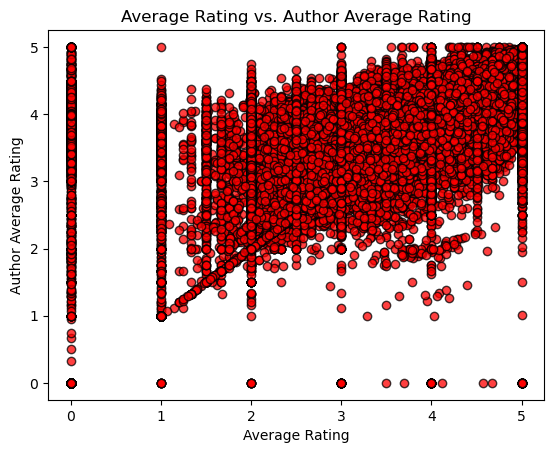

In [15]:
#Scatter plot for Average Rating vs. Author Average Rating
plt.scatter(df['average_rating'], df['author_average_rating'], marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.title("Average Rating vs. Author Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Author Average Rating")
plt.show()

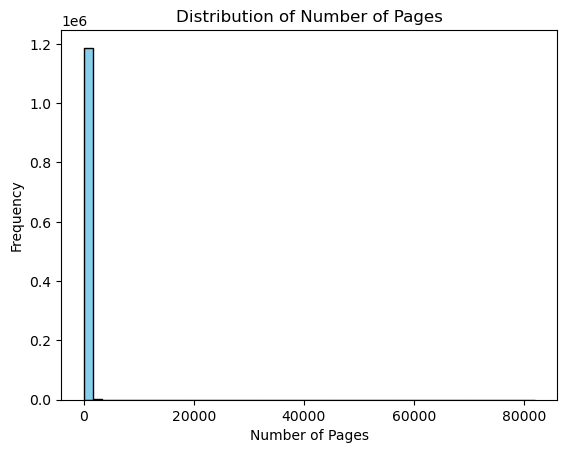

In [16]:
#Histogram for Number of Pages
plt.hist(df['num_pages'], bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of Number of Pages")
plt.xlabel("Number of Pages")
plt.ylabel("Frequency")

plt.show()

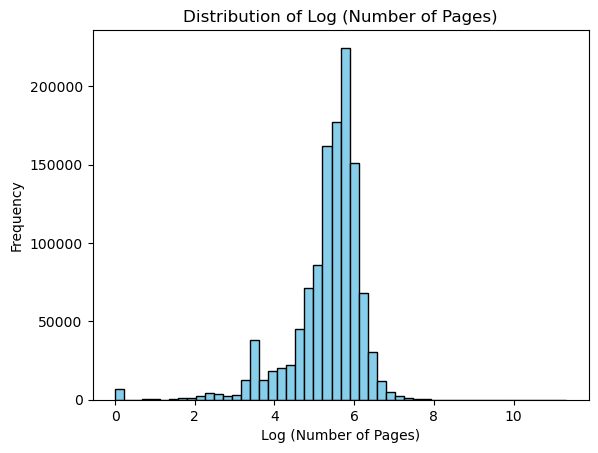

In [17]:
#Log Transformation (to help visualize the distribution more effectively)
#Add a small constant to avoid taking the logarithm of zero or negative values
df['log_num_pages'] = np.log(df['num_pages'] + 1)

#Plot the histogram
plt.hist(df['log_num_pages'], bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of Log (Number of Pages)")
plt.xlabel("Log (Number of Pages)")
plt.ylabel("Frequency")

plt.show()

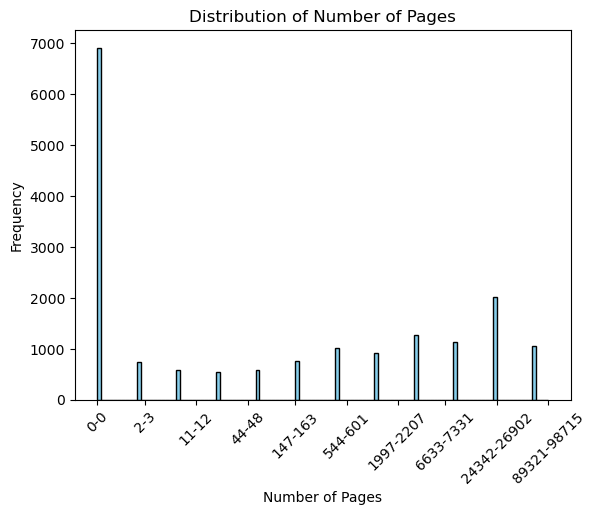

In [18]:
#Create custom bins with intervals of 100 pages each
df['log_num_pages'] = np.log1p(df['num_pages'])

#Define custom bin edges
bin_width = 0.1
custom_bins = np.arange(0, df['log_num_pages'].max() + bin_width, bin_width)

#Plot the histogram with custom bins
plt.hist(df['num_pages'], bins=custom_bins, color='skyblue', edgecolor='black')
plt.title("Distribution of Number of Pages")
plt.xlabel("Number of Pages")
plt.ylabel("Frequency")

# Set custom labels for a subset of bins on the x-axis
visible_labels = 10  # Adjust the number of visible labels
label_indices = np.linspace(0, len(custom_bins) - 1, visible_labels, dtype=int)
plt.xticks(custom_bins[label_indices], [f"{round(np.exp(x)-1)}-{round(np.exp(x+bin_width)-1)}" for x in custom_bins[label_indices]], rotation=45)

plt.show()

In [19]:
# Count the number of blanks (missing values) in the 'num_pages' column
blank_count = df['num_pages'].isnull().sum()

# Count the number of zeros in the 'num_pages' column
zero_count = (df['num_pages'] == 0).sum()

print(f"Number of blanks (missing values): {blank_count}")
print(f"Number of zeros: {zero_count}")

Number of blanks (missing values): 0
Number of zeros: 6918


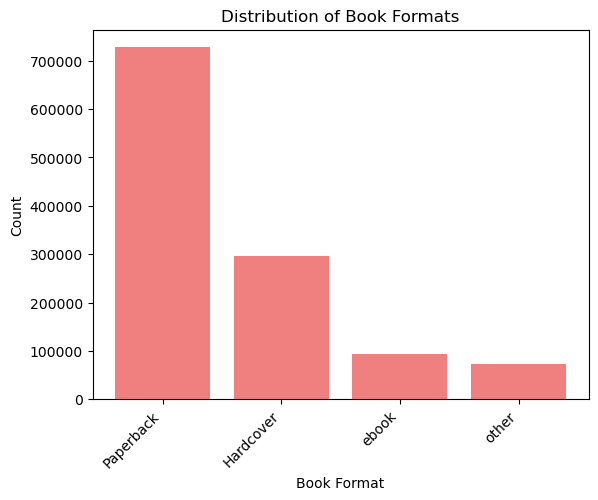

In [20]:
# Bar chart for Format
format_counts = df['format'].value_counts()
plt.bar(format_counts.index, format_counts.values, color='lightcoral')
plt.title("Distribution of Book Formats")
plt.xlabel("Book Format")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')

plt.show()

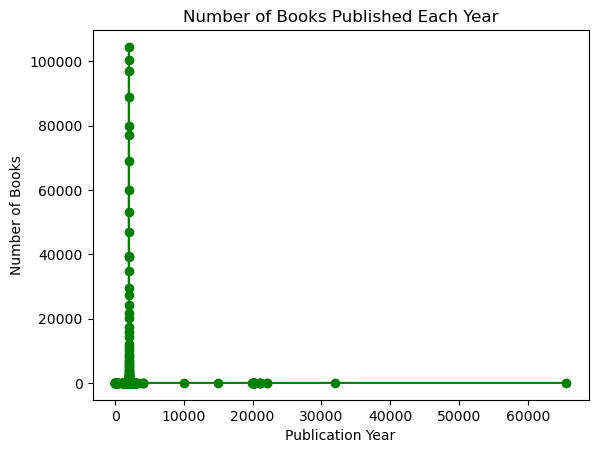

In [21]:
#Line chart for Publication Year
year_counts = df['publication_year'].value_counts().sort_index()
plt.plot(year_counts.index, year_counts.values, marker='o', color='green')
plt.title("Number of Books Published Each Year")
plt.xlabel("Publication Year")
plt.ylabel("Number of Books")

plt.show()

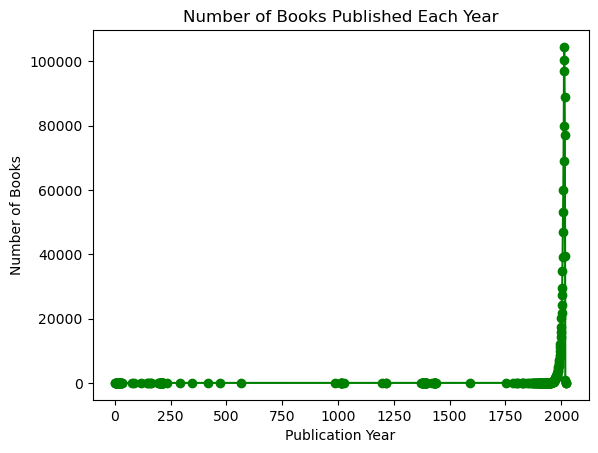

In [22]:
#Create new line chart for Publication Year filtering out values after 2023
filtered_df = df[df['publication_year'] <= 2023]

#Calculate the number of books published each year in the filtered DataFrame
year_counts = filtered_df['publication_year'].value_counts().sort_index()

#Plot the line chart
plt.plot(year_counts.index, year_counts.values, marker='o', color='green')
plt.title("Number of Books Published Each Year")
plt.xlabel("Publication Year")
plt.ylabel("Number of Books")

plt.show()

In [23]:
#Find the value counts of each publication year
year_value_counts = df['publication_year'].value_counts().sort_index()

#Print or display the value counts
print("Value Counts of Publication Year:")
print(year_value_counts)

Value Counts of Publication Year:
1        2
2        7
3        1
4        4
5        2
        ..
21017    1
22012    2
22015    1
32014    1
65535    5
Name: publication_year, Length: 354, dtype: int64


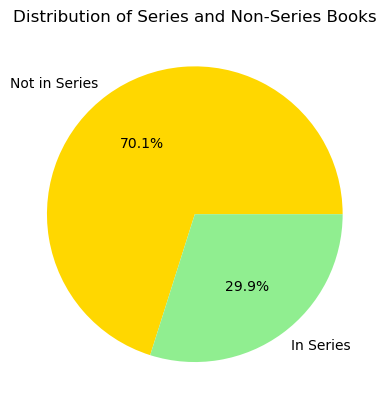

In [24]:
# Pie chart for Series Binary
series_counts = df['series_binary'].value_counts()
plt.pie(series_counts, labels=['Not in Series', 'In Series'], autopct='%1.1f%%', colors=['gold', 'lightgreen'])
plt.title('Distribution of Series and Non-Series Books')
plt.show()